<a href="https://colab.research.google.com/github/pinheiroanifa5/Anifa-Pinheiro/blob/master/CNN%26ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPENCV CHEAT SHEET

## Importing an Image & Viewing it

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/transferir (1).jpg")

print(type(image))
(h, w, d) = image.shape
print(image.shape)
print("Height: ", h)
print("Width: ", w)
print("Depth: ", d)

<class 'numpy.ndarray'>
(600, 1069, 3)
Height:  600
Width:  1069
Depth:  3


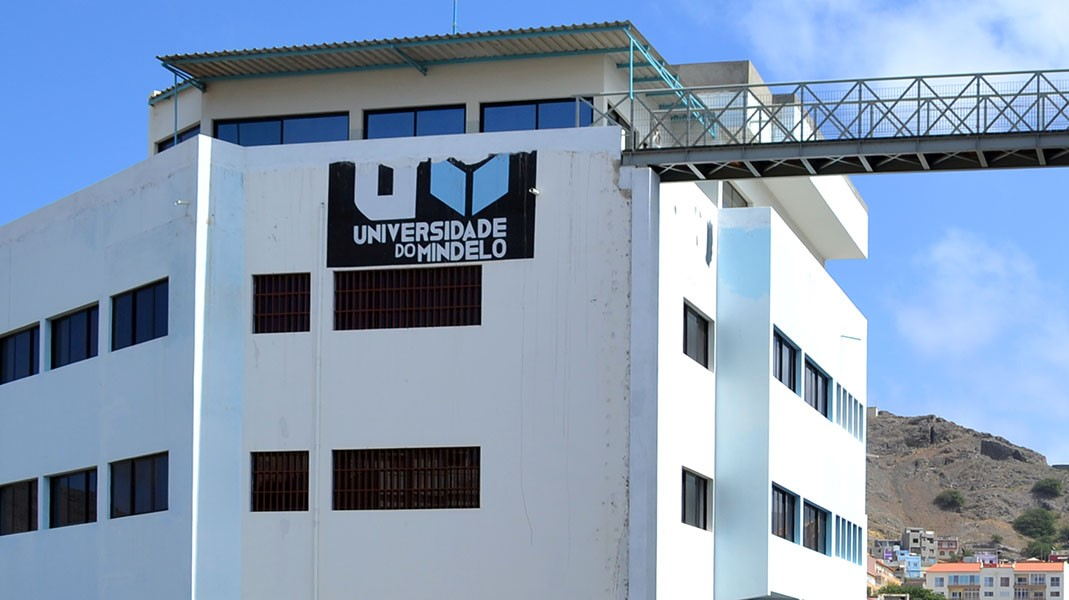

In [ ]:
cv2_imshow(image)

In [ ]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

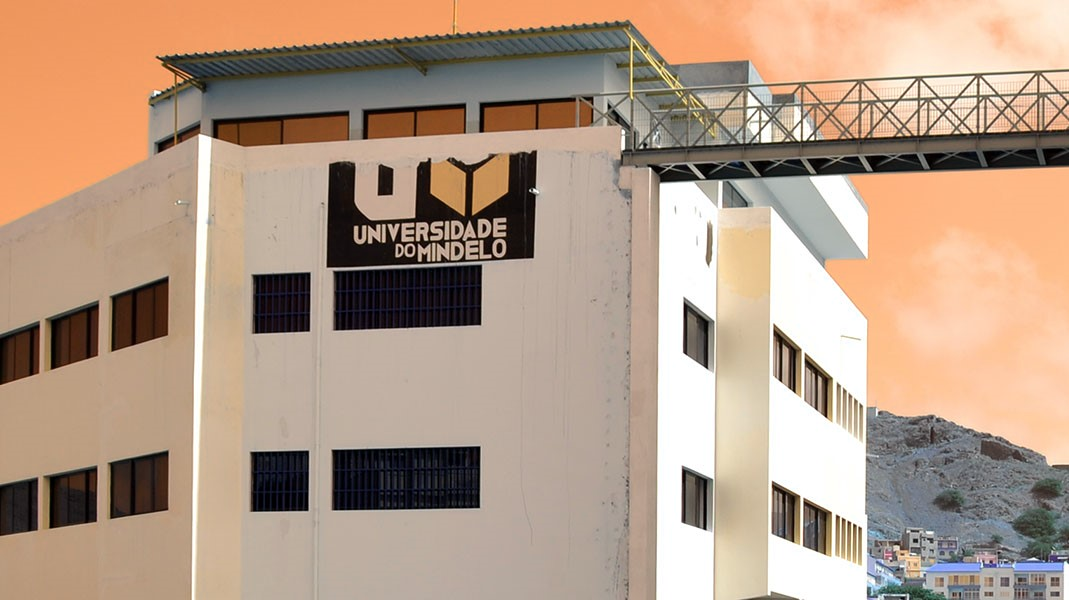

In [ ]:
cv2_imshow(rgb_image)

## Cropping

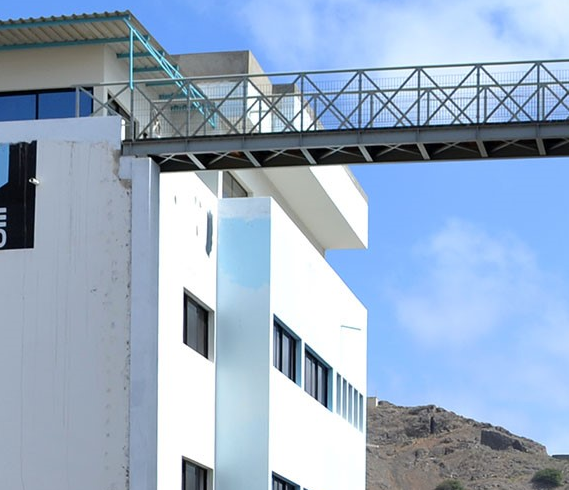

In [ ]:
cropped = image[10:500, 500:2000]
cv2_imshow(cropped)

## Resizing

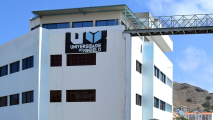

In [ ]:
width = int(w * 20 / 100)
height = int(h * 20 / 100)
dim = (width, height)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

cv2_imshow(resized)

## Rotating

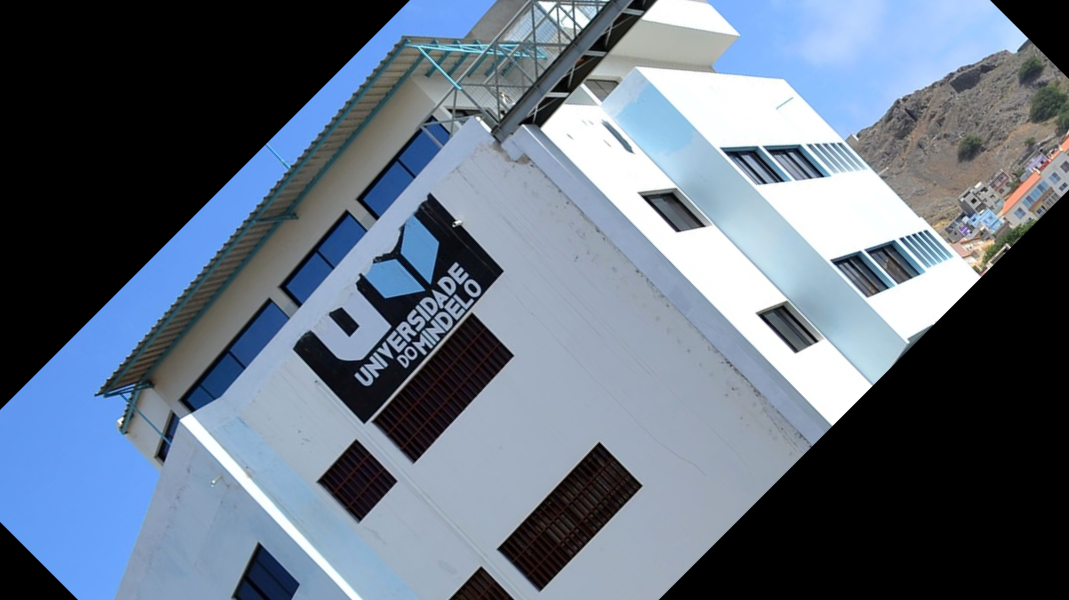

In [ ]:
(h, w, d) = image.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)

## Grayscaling and Thresholding

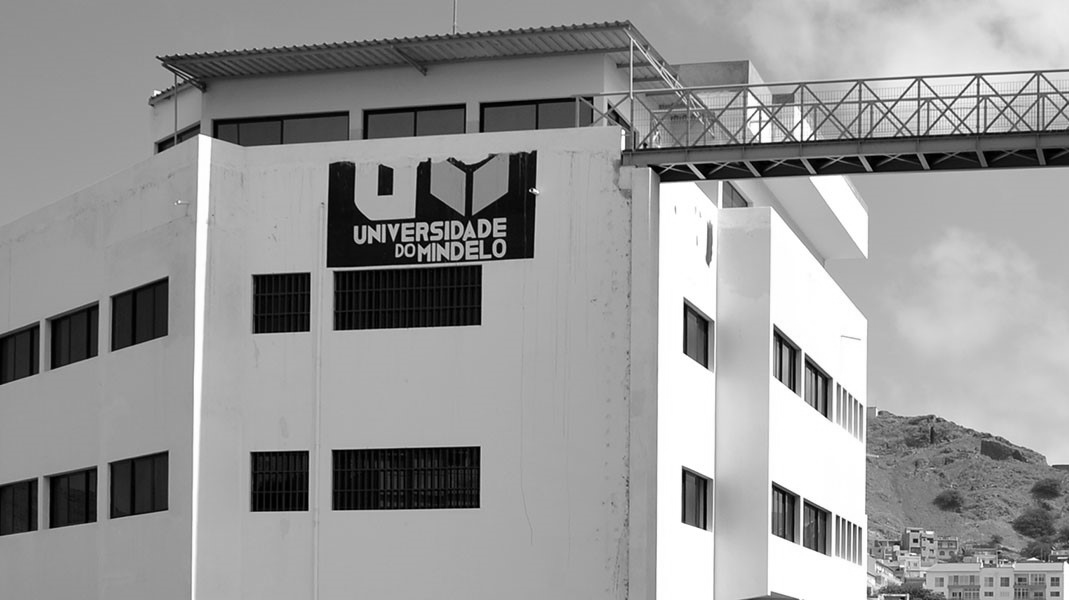

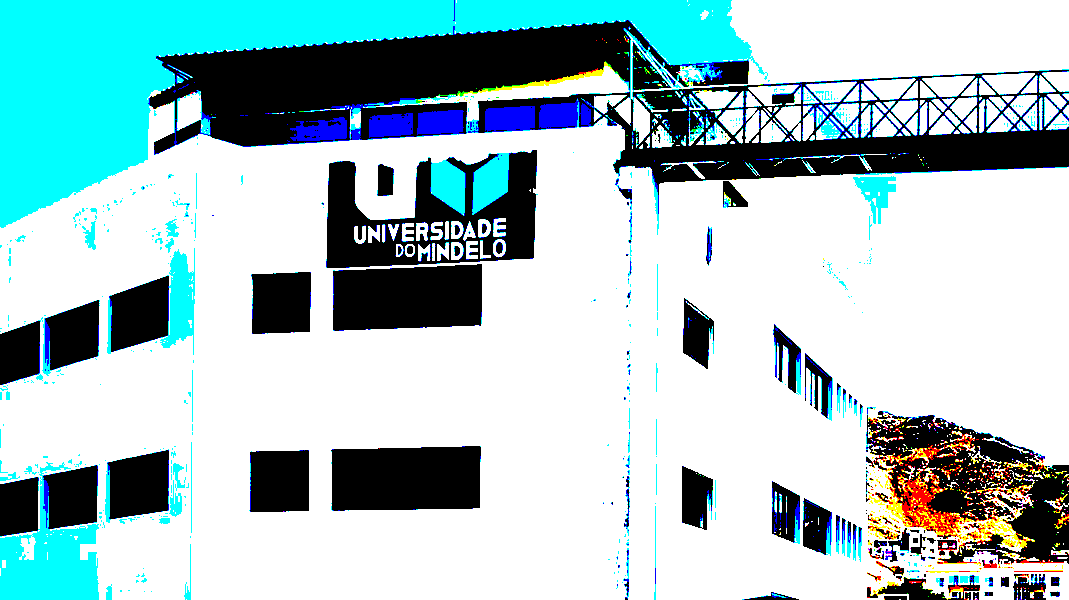

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, threshold_image = cv2.threshold(image, 127, 255, 0)

cv2_imshow(gray_image)
cv2_imshow(threshold_image)

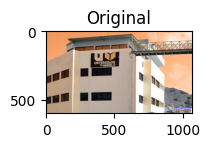

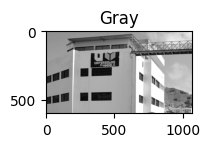

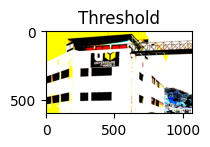

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

titles = ['Original', 'Gray', 'Threshold']
images = [image, gray_image, threshold_image]

for i in range(3):
  plt.subplot(2,3,i+1),
  plt.imshow(images[i],'gray',vmin=0,vmax=255)
  plt.title(titles[i])
  plt.show()

In [ ]:

titles = ['Original', 'Gray', 'Threshold']
images = [image, gray_image, threshold_image]

for i in range(3):
  plt.subplot(2,3,i+1),
  plt.imshow(images[i],'gray',vmin=0,vmax=255)
  plt.title(titles[i])
  plt.show()

## Drawing a Rectangle/Bounding Box on an Image

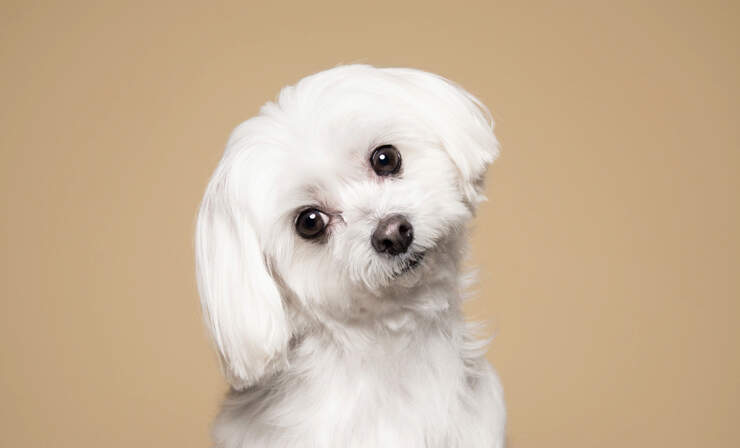

In [ ]:
dog = cv2.imread("/content/drive/MyDrive/Classroom/IA Deep Learning/maltese-portrait.jpg")
cv2_imshow(dog)

The rectangle function takes 5 parameters:
- The first parameter is the image.
- The second parameter is **x1, y1** — **Top Left Corner**.
- The third parameter is **x2, y2** — **Bottom Right Corner**.
- The fourth parameter is the **rectangle color **(GBR/RGB, depending on how you imported your image).
- The fifth parameter is the rectangle **line thickness**.

`**cv2.rectangle(image, start_point, end_point, color, thickness)**`

448 740 3


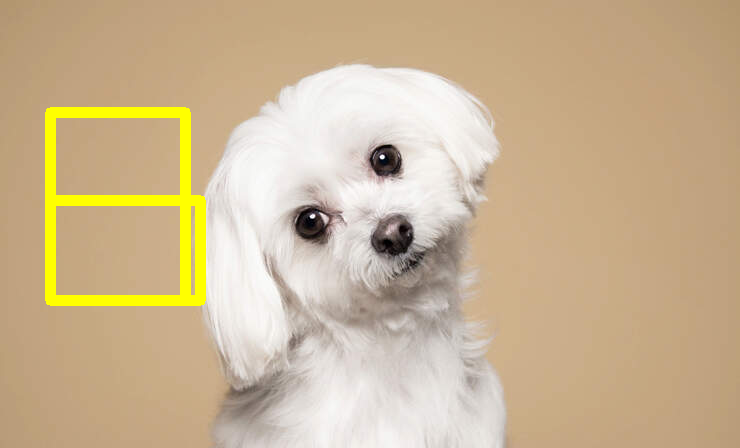

In [ ]:
(h, w, d) = dog.shape
print(h, w, d)

half_h = int(h/2)
half_w = int(w/2)

cv2.rectangle(dog, (200, 200), (50, 300), (0, 255, 255), 10)
cv2_imshow(dog)

## Writing on an image

The putText function takes 7 parameters
- The first parameter is the image you want to write on.
- The second parameter is the text itself.
- The third parameter is the x, y—the bottom left coordinate where the text starts.
- The fourth parameter is the font type.
- The fifth parameter is the font size.
- The sixth parameter is the color (GBR/RGB depending on how you imported your image).
- The seventh parameter is the thickness of the text.


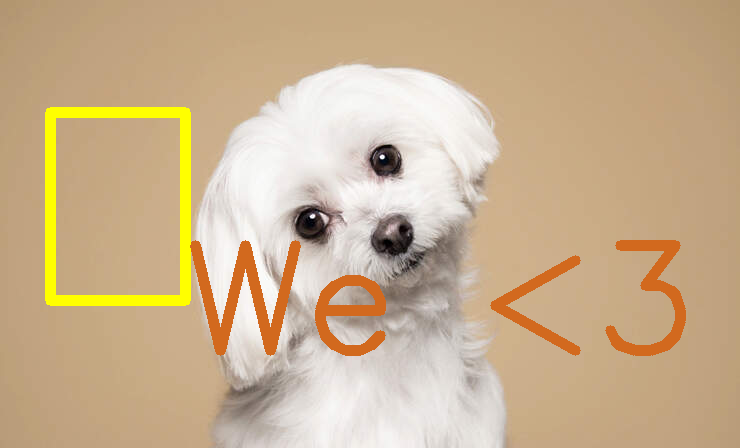

In [ ]:

cv2.putText(dog, "Hello OpenCV", (w // 4, 350), cv2.FONT_HERSHEY_SIMPLEX, 5, (30, 105, 210), 10)
cv2_imshow(dog)

## Finally, Saving the image


In [ ]:
image = cv2.imread("")
cv2.imwrite("output.jpg", image)

2 faces detected!


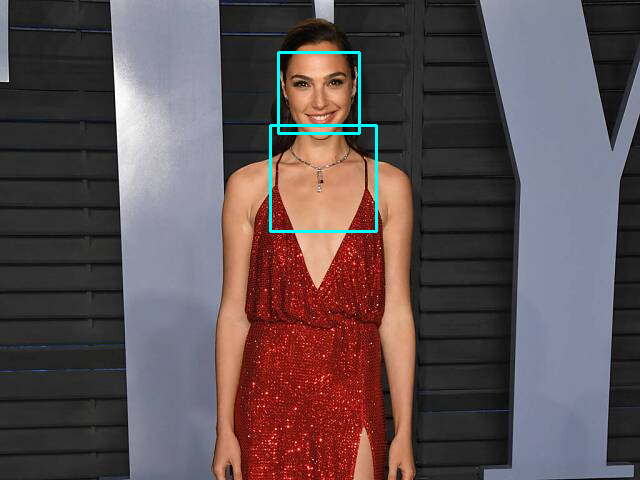

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_path = "/content/drive/MyDrive/Classroom/IA Deep Learning/gal-gadot,194650_aufmacher_640.jpg"

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(10, 10))

faces_detected = format(len(faces)) + " faces detected!"
print(faces_detected)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)

cv2_imshow(image)

# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [ ]:
X_train=X_train/255
X_test=X_test/255

X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1605760   
                                                      

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(X_train,y_train, epochs = epochs)



NameError: name 'y_train' is not defined

{'loss': [0.18739424645900726, 0.07684576511383057, 0.05726798623800278, 0.043723393231630325, 0.036162540316581726, 0.03090893104672432, 0.031967952847480774, 0.027872731909155846, 0.023424606770277023, 0.02223299629986286], 'accuracy': [0.9435625076293945, 0.976687490940094, 0.9833124876022339, 0.9869791865348816, 0.9885208606719971, 0.9903333187103271, 0.9899374842643738, 0.9914374947547913, 0.9927499890327454, 0.9928749799728394], 'val_loss': [0.05187881365418434, 0.0404493473470211, 0.03721681609749794, 0.03620076924562454, 0.037868812680244446, 0.04325496777892113, 0.045803070068359375, 0.03543144837021828, 0.03850294649600983, 0.03613252937793732], 'val_accuracy': [0.984250009059906, 0.9884999990463257, 0.9900000095367432, 0.9889166951179504, 0.9894999861717224, 0.9879166483879089, 0.9888333082199097, 0.9913333058357239, 0.9899166822433472, 0.9913333058357239], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0232 - accuracy: 0.9922


[0.023152945563197136, 0.9922000169754028]

In [ ]:
y_predicted_by_model=model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
y_predicted_by_model[0]


array([1.8984954e-19, 1.1765426e-12, 1.4523410e-11, 8.9397073e-10,
       2.2635697e-17, 4.4550958e-16, 5.0645274e-23, 1.0000000e+00,
       2.1074036e-15, 1.4443527e-10], dtype=float32)

In [ ]:
import numpy as np

np.argmax(y_predicted_by_model[0])


7

# OWN DATA

https://keras.io/api/data_loading/image/

https://www.kaggle.com/code/toniesteves/deep-learning-from-scratch-cnn